In [ ]:
# !pip install shap

In [ ]:
import shap
import os
import json
import joblib
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
# load dataset
X = pd.read_csv("./data/test_set/test_G.csv")
X = X.iloc[:, 2:]
X = pd.DataFrame(X)

In [4]:
X

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc755,pc756,pc757,pc758,pc759,pc760,pc761,pc762,pc763,pc764
0,-0.000844,-0.001919,-0.000366,0.007589,-0.009500,-0.002823,-0.006335,0.003479,-0.003030,-0.008519,...,0.002912,0.003996,0.006343,0.004298,-0.001465,0.013453,-0.005406,0.007978,0.000846,-0.002177
1,-0.000844,-0.001919,-0.000366,0.007589,-0.009500,-0.002823,-0.006335,0.003479,-0.003030,-0.008519,...,0.002912,0.003996,0.006343,0.004298,-0.001465,0.013453,-0.005406,0.007978,0.000846,-0.002177
2,-0.000844,-0.001919,-0.000366,0.007589,-0.009500,-0.002823,-0.006335,0.003479,-0.003030,-0.008519,...,0.002912,0.003996,0.006343,0.004298,-0.001465,0.013453,-0.005406,0.007978,0.000846,-0.002177
3,-0.000844,-0.001919,-0.000366,0.007589,-0.009500,-0.002823,-0.006335,0.003479,-0.003030,-0.008519,...,0.002912,0.003996,0.006343,0.004298,-0.001465,0.013453,-0.005406,0.007978,0.000846,-0.002177
4,-0.000844,-0.001919,-0.000366,0.007589,-0.009500,-0.002823,-0.006335,0.003479,-0.003030,-0.008519,...,0.002912,0.003996,0.006343,0.004298,-0.001465,0.013453,-0.005406,0.007978,0.000846,-0.002177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11550,-0.013766,0.006613,-0.004962,0.003549,0.001298,-0.016431,0.005173,0.029515,-0.003747,-0.007000,...,-0.071428,0.007028,0.014398,-0.002910,0.070537,0.099876,-0.031303,0.013386,0.008267,-0.058835
11551,-0.013766,0.006613,-0.004962,0.003549,0.001298,-0.016431,0.005173,0.029515,-0.003747,-0.007000,...,-0.071428,0.007028,0.014398,-0.002910,0.070537,0.099876,-0.031303,0.013386,0.008267,-0.058835
11552,-0.013766,0.006613,-0.004962,0.003549,0.001298,-0.016431,0.005173,0.029515,-0.003747,-0.007000,...,-0.071428,0.007028,0.014398,-0.002910,0.070537,0.099876,-0.031303,0.013386,0.008267,-0.058835
11553,-0.013766,0.006613,-0.004962,0.003549,0.001298,-0.016431,0.005173,0.029515,-0.003747,-0.007000,...,-0.071428,0.007028,0.014398,-0.002910,0.070537,0.099876,-0.031303,0.013386,0.008267,-0.058835


##  1. Global and local model interpretations  (lightGBM)

In [27]:
# Function to display top 20 significant features using summary_plot
def lightGBM_top_20_features(model, X):
    explainer = shap.TreeExplainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values, X, plot_type="bar", plot_size=(7,6), show=False)
    plt.title('Top 20 Significant Features')
    plt.savefig('./Results/plot/feature_importance_lightGBM.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [28]:
# Function to display SHAP values for each feature on the final yield prediction
def lightGBM_summary_plot(model, X):
    explainer = shap.TreeExplainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values.values, X, max_display=20,plot_size=(9,6), show=False, alpha=0.4)
    plt.title('SHAP Values for Each Feature')
    plt.savefig('./Results/plot/summary_plot_lightGBM.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [29]:
# Function to display individualized interpretations of yield predictions using waterfall plot
def lightGBM_waterfall_plot(model, X, index):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.plots.waterfall(shap_values[index], show=False)
    plt.title('Individualized Interpretation - Maize Hybrid ' + str(index))
    plt.savefig('./Results/plot/waterfall_plot_hybrid_lightGBM' + str(index) + '.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [30]:
# Load the trained prediction model
LlightGBM = joblib.load('./models/G2Pmodel/lightGBM.pkl')

100%|===================| 11536/11555 [08:54<00:00]        

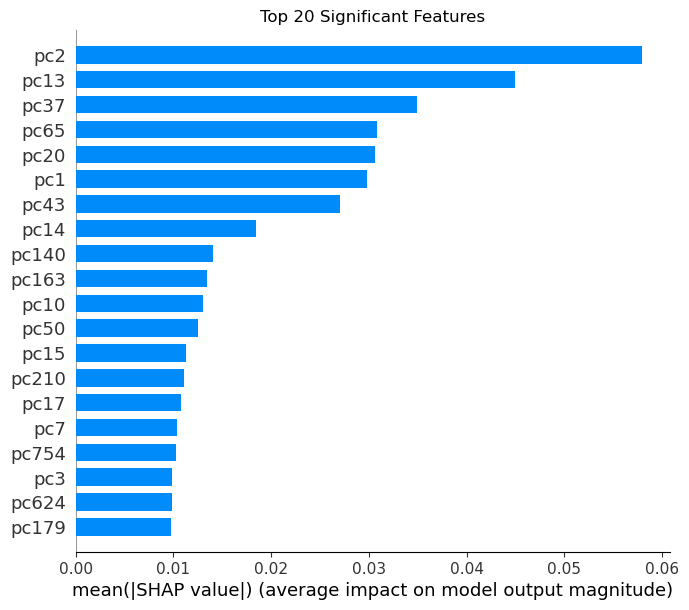

In [31]:
lightGBM_top_20_features(LlightGBM ,X)

In [ ]:
lightGBM_top_20_features(LlightGBM ,X)

In [ ]:
# The number '1' indicates the maize hybrid sample index.
# Replace '1' with the specific hybrid index you want to visualize
llightGBM_waterfall_plot(LlightGBM, X, 1)

##  2. Global and local model interpretations  (GBDT)

In [ ]:
# Function to display top 20 significant features using summary_plot
def GBDT_top_20_features(model, X):
    explainer = shap.TreeExplainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values, X, plot_type="bar", plot_size=(7,6), show=False)
    plt.title('Top 20 Significant Features')
    plt.savefig('./Results/plot/feature_importance_GBDT.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [ ]:
# Function to display SHAP values for each feature on the final yield prediction
def GBDT_summary_plot(model, X):
    explainer = shap.TreeExplainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values.values, X, max_display=20,plot_size=(9,6), show=False, alpha=0.4)
    plt.title('SHAP Values for Each Feature')
    plt.savefig('./Results/plot/summary_plot_GBDT.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [ ]:
# Function to display individualized interpretations of yield predictions using waterfall plot
def GBDT_waterfall_plot(model, X, index):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.plots.waterfall(shap_values[index], show=False)
    plt.title('Individualized Interpretation - Maize Hybrid ' + str(index))
    plt.savefig('./Results/plot/waterfall_plot_hybrid_GBDT' + str(index) + '.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [ ]:
# Load the trained prediction model
GBDT = joblib.load('./models/G2Pmodel/GBDT.pkl')

In [ ]:
GBDT_top_20_features(GBDT,X)

In [ ]:
GBDT_summary_plot(GBDT,X)

In [ ]:
# The number '1' indicates the maize hybrid sample index.
# Replace '1' with the specific hybrid index you want to visualize
GBDT_waterfall_plot(GBDT, X, 1)

##  3. Global and local model interpretations  (XGBoost)

In [ ]:
# Function to display top 20 significant features using summary_plot
def XGBoost_top_20_features(model, X):
    explainer = shap.TreeExplainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values, X, plot_type="bar", plot_size=(7,6), show=False)
    plt.title('Top 20 Significant Features')
    plt.savefig('./Results/plot/feature_importance_XGBoost.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [ ]:
# Function to display SHAP values for each feature on the final yield prediction
def XGBoost_summary_plot(model, X):
    explainer = shap.TreeExplainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values.values, X, max_display=20,plot_size=(9,6), show=False, alpha=0.4)
    plt.title('SHAP Values for Each Feature')
    plt.savefig('./Results/plot/summary_plot_XGBoost.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [ ]:
# Function to display individualized interpretations of yield predictions using waterfall plot
def XGBoost_waterfall_plot(model, X, index):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.plots.waterfall(shap_values[index], show=False)
    plt.title('Individualized Interpretation - Maize Hybrid ' + str(index))
    plt.savefig('./Results/plot/waterfall_plot_hybrid_XGBoost' + str(index) + '.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [ ]:
# Load the trained prediction model
XGBoost = joblib.load('./models/G2Pmodel/XGBoost.pkl')

In [ ]:
XGBoost_top_20_features(XGBoost,X)

In [ ]:
XGBoost_summary_plot(XGBoost,X)

In [ ]:
# The number '1' indicates the maize hybrid sample index.
# Replace '1' with the specific hybrid index you want to visualize
XGBoost_waterfall_plot(XGBoost, X, 1)

##  4. Global and local model interpretations  (RF)

In [18]:
# Function to display top 20 significant features using summary_plot
def RF_top_20_features(model, X):
    explainer = shap.TreeExplainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values, X, plot_type="bar", plot_size=(7,6), show=False)
    plt.title('Top 20 Significant Features')
    plt.savefig('./Results/plot/feature_importance_RF.pdf', format='pdf', bbox_inches='tight')
    plt.show()


In [19]:
# Function to display SHAP values for each feature on the final yield prediction
def RF_summary_plot(model, X):
    explainer = shap.TreeExplainer(model, X)
    shap_values = explainer(X)
    shap.summary_plot(shap_values.values, X, max_display=20,plot_size=(9,6), show=False, alpha=0.4)
    plt.title('SHAP Values for Each Feature')
    plt.savefig('./Results/plot/summary_plot_RF.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [20]:
# Function to display individualized interpretations of yield predictions using waterfall plot
def RF_waterfall_plot(model, X, index):
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)
    shap.plots.waterfall(shap_values[index], show=False)
    plt.title('Individualized Interpretation - Maize Hybrid ' + str(index))
    plt.savefig('./Results/plot/waterfall_plot_hybrid_RF' + str(index) + '.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [21]:
# Load the trained prediction model
RF = joblib.load('./saved_models/G2Pmodel/RFR.pkl')

100%|===================| 11552/11555 [09:20<00:00]        

<Figure size 640x480 with 0 Axes>

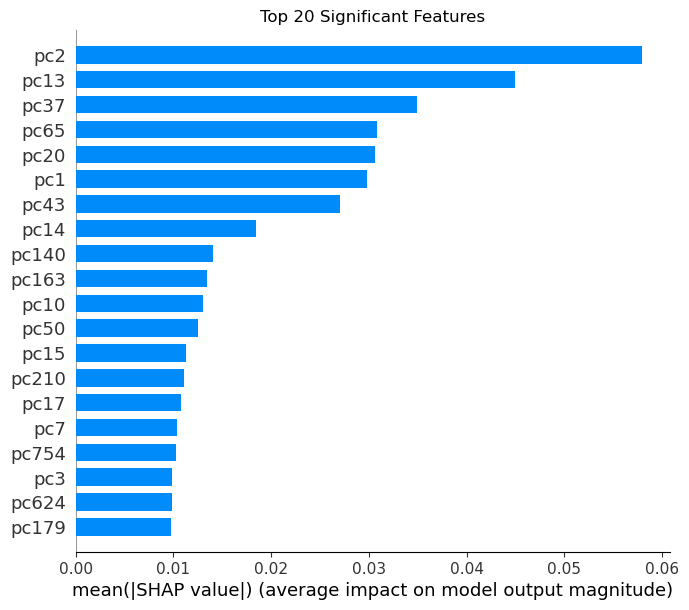

In [22]:
RF_top_20_features(RF,X)

100%|===================| 11543/11555 [09:20<00:00]        

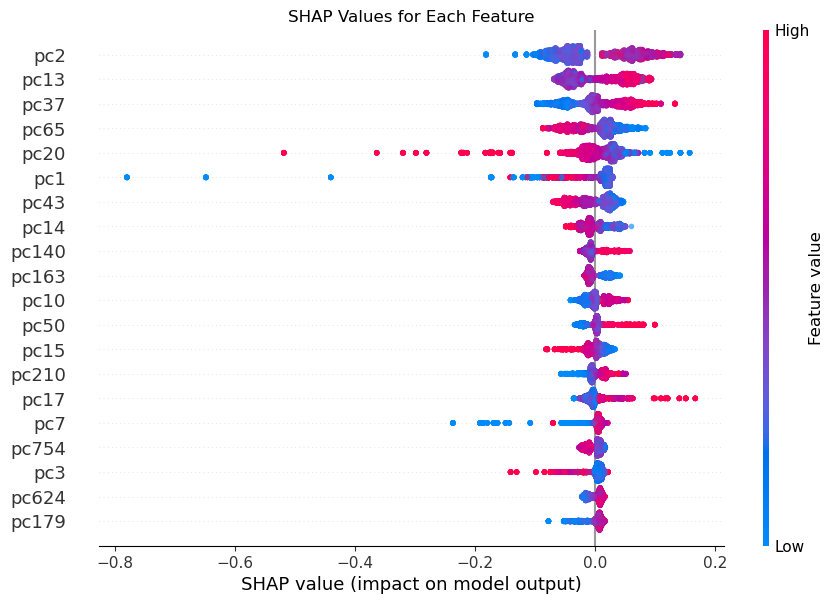

In [23]:
RF_summary_plot(RF,X)

In [ ]:
# The number '1' indicates the maize hybrid sample index.
# Replace '1' with the specific hybrid index you want to visualize
RF_waterfall_plot(RF, X, 1)

## 5. Pruned decision tree for predicting yield variation in a training set

In [66]:
# !pip install pydotplus
import os
import pydotplus
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
os.environ["PATH"] += os.pathsep + 'D:/TingxiYu/softwore/GraphViz/Graphviz/bin'

In [68]:
# load training dataset
data = pd.read_csv('./data/train_set/Train_data.csv')
feature = data.iloc[:,4:801]
pheno = data.iloc[:,3]
feature_names = feature.columns.tolist()  # Get a list of feature names

In [69]:
feature

,QV2M,T2MDEW,PS,RH2M,WS2M,ALLSKY_SFC_SW_DWN,T2M_MAX,T2M_MIN,T2MWET,T2M,...,pc754,pc755,pc756,pc757,pc758,pc759,pc760,pc761,pc762,pc763
0,0.697533,0.733789,0.010187,0.203458,0.201253,0.458985,0.548181,0.644584,0.686185,0.630614,...,0.019021,-0.007136,0.001149,0.010078,-0.012357,-0.021982,-0.016248,0.003258,0.007962,0.017056
1,0.446653,0.558825,-0.163150,-0.966587,0.327242,0.727414,0.807420,0.723385,0.681904,0.785403,...,0.019021,-0.007136,0.001149,0.010078,-0.012357,-0.021982,-0.016248,0.003258,0.007962,0.017056
2,0.778045,0.745984,-0.474738,0.097670,0.293034,0.686010,0.596406,0.681559,0.710836,0.666471,...,0.019021,-0.007136,0.001149,0.010078,-0.012357,-0.021982,-0.016248,0.003258,0.007962,0.017056
3,0.496427,0.586201,0.039706,-0.048755,0.146317,0.361829,0.547501,0.539904,0.581075,0.566885,...,0.019021,-0.007136,0.001149,0.010078,-0.012357,-0.021982,-0.016248,0.003258,0.007962,0.017056
4,0.383585,0.499223,-0.268584,-0.199604,0.388095,0.427869,0.483272,0.476323,0.506977,0.505901,...,0.019021,-0.007136,0.001149,0.010078,-0.012357,-0.021982,-0.016248,0.003258,0.007962,0.017056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70688,0.515234,0.615173,-0.023350,0.158546,0.242799,0.528329,0.469091,0.517720,0.574916,0.527973,...,-0.003640,0.000941,0.001937,0.002968,-0.000579,0.000174,-0.001298,0.002993,-0.006646,-0.003087
70689,0.383585,0.499223,-0.268584,-0.199604,0.388095,0.427869,0.483272,0.476323,0.506977,0.505901,...,-0.003640,0.000941,0.001937,0.002968,-0.000579,0.000174,-0.001298,0.002993,-0.006646,-0.003087
70690,1.335920,1.135782,0.241929,0.108084,-0.212210,0.762747,0.948972,1.102519,1.099514,1.047660,...,-0.003640,0.000941,0.001937,0.002968,-0.000579,0.000174,-0.001298,0.002993,-0.006646,-0.003087
70691,0.446653,0.558825,-0.163150,-0.966587,0.327242,0.727414,0.807420,0.723385,0.681904,0.785403,...,-0.003640,0.000941,0.001937,0.002968,-0.000579,0.000174,-0.001298,0.002993,-0.006646,-0.003087


In [70]:
pheno

0        12.017514
1        12.002434
2         7.820020
3        11.787163
4        10.496637
           ...    
70688    12.618064
70689     5.526066
70690     6.699673
70691    11.160092
70692     9.375607
Name: Yield, Length: 70693, dtype: float64

In [76]:
tree = DTR(max_depth=15
         ,max_leaf_nodes=20
         ,criterion="friedman_mse"
         ,min_samples_leaf=15
         ,max_features="sqrt",random_state=211)

tree.fit(feature, pheno)
pred = tree.predict(feature)
RMSE = np.sqrt(mean_squared_error(pheno, pred))
PCCs = pearsonr(pheno, pred)
print(RMSE)
print(PCCs)

sub_tree = tree
dot_data = export_graphviz(sub_tree
                           , out_file=None
                           , filled=True
                           , rounded=True
                           , special_characters=True
                           , precision=2
                           ,feature_names=feature_names)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("./Results/plot/tree.pdf")

2.6138883387138865
PearsonRResult(statistic=0.4896514021891275, pvalue=0.0)


True